## <font color= darkblue> Statistical Models Application For Bitcoin Daily Direction Analysis</font>
###### <font color= green> "Finance is not a plug-and-play subject as it relates to machine learning. Modelling financial series is harder than driving cars or recognizing faces." (Marcos Lopez de Prado)</font>
\author{Agustin Muñoz Gonzalez} \date{July 2021}

\maketitle
\makeatletter
\renewcommand{\@seccntformat}[1]{}
\makeatother

##### <font color= darkblue> Abstract

Although the applications of deep neural networks (deep learning) have allowed investors to estimate the direction of the movement of financial assets, there are not still many results on these applications for the so-called '' alternative currencies '' such as Bitcoin (BTC), which has had phenomenal growth during 2020. That is why we consider pertinent to study and explore investment applications of various typical, and not so typical, statistical models of data science for the problem of estimating daily direction future of BTC. In particular, the penultimate model shown is an LSTM neural network whose topology is different from classical networks and makes them especially useful for working with data that have a short- and long-term time dependence, such as financial time series. We have used in this project the Python language and real historical data from the BTC. The originality of the work is due not only to the application of various statistical models but also to the incorporation of metrics called '' on-chain '' linked purely and exclusively to the block chain, and which are gaining more and more relevance.


##### <font color= darkblue> Key words:</font> 

<font color= dimgray> Data-science – Statistical learning – Deep Learning – Long Short-Term Memory Neural Networks – Bitcoin – Asset Movement Prediction</font> 

##### <font color= darkblue> Introducción 

In this project we will analyze the application and performance of different models to the problem of classifying the daily movement of Bitcoin. That is, the response variable will be a binary categorical variable: $ + 1 $ if the closing price of the next day is higher than the last closing and $ 0 $ otherwise.

While BTC (Bitcoin) has been developed for several years now, it has recently caught the attention of both institutional investors and retailers. Because it is still a novel technology even among experts it is not entirely clear what factors affect its movement. That is why the explanatory variables (features) that we will consider will try to cover aspects linked to factors that may be relevant, they are:

\begin{itemize}
\item BTC's daily price;
\item BTC's ''price discovery'' process (new highs and lows);
\item ''Market sentiment'': typical indicators that serve as a thermometer and as market narrative;
\item Technical indicators;
\item ''On-chain'' metrics: Typical metrics of the Blockchain.
\end{itemize}

We have separated the work into two parts. 
    
In the first part, we will dedicate ourselves to assembling the BTC data set with data obtained from the Bitstamp exchange through the quandl.com site. In addition, we will obtain the data associated with the explanatory variables, mentioned above, from the Investing.com and docs.coinmetrics.io sites. Then, we will make a selection of the most relevant variables according to the explanatory paradigm. Finally, we will finish preparing the training and testing sets that we will use in the second part.
    
In the second part we will build several statistical models in increasing order of complexity. In addition, we will analyze and compare the performance of each. Furthermore, we will show some typical problems of data science such as the problem of overfitting a model or the little amount of data available, and some ideas to overcome them. Finally, we will graph the strategies resulting from following the predictions of each model.

Finally, in the conclusion, we will make the final comparison between the models according to different metrics such as algorithm convergence speed, prediction score and degree of overfitting, to find the best models.

The bibliography is at the end, with papers, web links, books, etc., related to the topics discussed and that we have used throughout the work.

\clearpage

# <font color= darkblue> Part I: Exploratory Data Analysis \& Engineering Data Features</font>


### <font color= darkblue>Financial Data Preprocessing, Feature Engineering and Feature Learning</font>

A time series is a series of data points indexed in time order. Financial Data such as bitcoin's price series observed at equally spaced points in time are an example of such a series. It is a sequence of observations recorded at regular time intervals and depending on the frequency of observations, a time series may typically be in seconds, minute, hourly, daily, weekly, monthly, quarterly and annually.

The first step towards any data analysis would be to parse the raw data which involves extracting the data from the source and then cleaning and filling the missing data, if any. While data comes in many forms, Python makes it easy to read time series data using useful packages such as pandas.

### <font color= darkblue>Importing required libraries</font>

Initially we import several libraries and Python packages that we will use throughout the work, they will cover aspects of data visualization, exploration and analysis, as well as results visualization.

In addition, we will import several Keras sub-package modules necessary for the creation of the models and the measurement of their performance. Keras is a Python API and is one of the most powerful and user-friendly libraries that is based, in turn, on the popular TensorFlow library for the creation of machine learning and deep learning models.

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math

# Sklearn
import sklearn
# Preprocessor from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keras
import keras
# ANNs from keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout, Dense, LSTM

# Import cufflinks for visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Feature selection
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from skpp import ProjectionPursuitRegressor
from skpp import ProjectionPursuitClassifier
# # ANNs
# from tensorflow.keras import Input
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.models import load_model, Model

# Model Metrics
from sklearn.metrics import accuracy_score
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Resample
# Block Bootstrap
from arch.bootstrap import StationaryBootstrap
# Time Series cross-validation
from sklearn.model_selection import TimeSeriesSplit

# Class encoder
from sklearn.preprocessing import LabelEncoder 

Seteamos las semillas correspondientes para que el trabajo sea reproducible.

In [3]:
# We set a seed value in order to be able of reproduce the results.
seed_value= 123
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.set_random_seed(seed_value)

from numpy.random import seed
seed(123)

#### <font color= darkblue> Data Collection</font>

The work is based on data from the sites Bitsamp (via quand.com), Investing.com and docs.coinmetrics.io. Although initially we will consider historical BTC data from April 15, 2014, when we clean up missing data and assemble the dataframe with all the features, we will end up using historical data with daily frequency from February 23, 2017 to February 15. March 2021, that is, around 1000 data.

In [4]:
Bitcoin=pd.read_csv('data/BITSTAMP-USD.csv', index_col=0, parse_dates=True)[::-1].dropna()
Bitcoin.head()

,High,Low,Last,Bid,Ask,Volume,VWAP
Date,,,,,,,
2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22


#### <font color= darkblue>Visualising Bitcoin Prices fluctations</font>

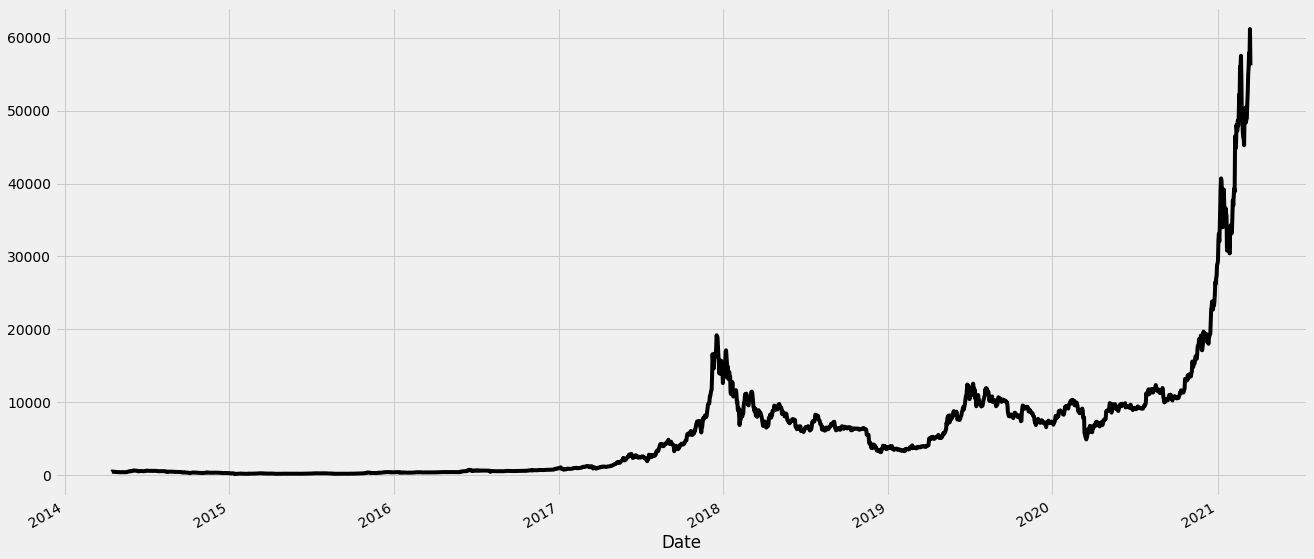

In [5]:
Bitcoin['Last'].plot(figsize=(20,10),color='black');

Again, the explanatory variables that we will handle will cover the following aspects of BTC (and the market in general):

\begin{itemize}
\item Closely related factors with Bitcoin's spot price such as: BTC's Futures and Ethereum's price;
\item Macro indicators: a few important commodities such as crude, 10 years treasury and VIX volatility index;
\item Technnical indicators linked with volume, momentum, volatily and BTC candlestick data;
\item On-chain metrics, i.e., Blockchain closely related metrics.
\end{itemize}

#### <font color= darkblue> Features</font>

\begin{center}
	\begin{tabular}{|p{0.3\linewidth} | p{0.6\linewidth}|}
		\hline
		\textbf{CME\_BitcoinFutures} & BTC's Futures\\ \hline
		\textbf{ETH} & Ethereum's prices\\ \hline
		\textbf{CRUDE, Gold, Treasury\_10} & OIL's and Crude's futures, and 10 years treasury\\ \hline
		\textbf{SPY} & S\&P's futures\\ \hline
		\textbf{ATR} & Average True Range (ATR): A technical indicator of BTC volatility\\ \hline
		\textbf{OBV} & On-balance volume (OBV) is a technical momentum indicator that uses the daily volume of Bitcoin\\ \hline
		\textbf{sma14, sma60} & Simple 14- and 60-day moving averages of Bitcoin's daily closing price\\ \hline
		\textbf{vol14, vol60} & 14 and 60 Day Implied Volatility Indices of Bitcoin Daily Returns\\ \hline
		\textbf{sma20, b\_upper, b\_lower} & Bollinger Bands are another technical indicator used to measure the overbought or oversold of an asset\\ \hline
		\textbf{MOM5D} & Momentum 5 days from the daily return of Bitcoin\\ \hline
		\textbf{High, Low, Last, Bid, Ask, VWAP, Volume} & Bitcoin daily technical data\\ \hline
		\textbf{Returns} & Returns compared to the closing price of Bitcoin of the previous day \\ \hline
		\textbf{MVRV\_FF} & Quotient between the market capitalization of bitcoin and its effective capitalization (market-value-to-realized-value). The latter takes into account, for a certain group of BTC, the price they had the last time they were moved\\ \hline
		\textbf{HashRate} & Speed at which calculations are completed (proof-of-work) on all miners on the network\\ \hline
		\textbf{Miner\_revenue} & The sum of the USD value of all miners' revenue (fees plus recently issued native units) per day\\ \hline
	\end{tabular}
\end{center}

We define the functios that we'll use to calculate some of the mentioned features.

In [6]:
# we assume that df's order is increasing in dates
def ATR(df,n):
    "function to calculate True Range and Average True Range"
    df = df.copy()

    df['H-L']  = abs(df['High']-df['Low'])
    df['H-PO'] = abs(df['High']-df['Open'].shift(1))
    df['L-PO'] = abs(df['Low']-df['Open'].shift(1))
    
    df['TR']   = df[['H-L','H-PO','L-PO']].max(axis=1,skipna=False)
    df['ATR']  = df['TR'].rolling(n).mean()

    df2 = df.drop(['H-L','H-PO','L-PO'],axis=1)
    return df2

def OBV(df):
	n=len(df)
	OBV=[]
	OBV.append(0)
	for i in range(0,n-1):
		if df['Price'][i]<df['Price'][i+1]:
			OBV.append(OBV[i]+df['Volume'][i+1])
		elif df['Price'][i]>df['Price'][i+1]:
			OBV.append(OBV[i]-df['Volume'][i+1])
	return OBV

# 'CME_BitcoinFutures' and 'ETH' data is expressed as string, so we have to convert it to float.
def text_currency_to_float(text):
  t = text
  dot_pos = t.rfind('.')
  comma_pos = t.rfind(',')
  if comma_pos > dot_pos:
    t = t.replace(".", "")
    t = t.replace(",", ".")
  else:
    t = t.replace(",", "")

  return(float(t))

We obtain the rest of the necessary data.

In [7]:
# Crudo
CRUDE=pd.read_csv('data/Crude Oil WTI Futures Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# 10-Y Treasury
Treasury_10=pd.read_csv('data/United States 10-Year Bond Yield Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# S&P Index
SPY=pd.read_csv('data/SPY Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
# GOLD
Gold=pd.read_csv('data/Gold Futures Historical Data.csv', index_col=0, parse_dates=True, thousands=',')['Price'].dropna()
# Gold=Gold[::-1]
CRUDE.head(),Treasury_10.head(),SPY.head(),Gold.head()

(Date
 2021-03-15    65.39
 2021-03-14    65.96
 2021-03-12    65.61
 2021-03-11    66.02
 2021-03-10    64.44
 Name: Price, dtype: float64,
 Date
 2021-03-15    1.607
 2021-03-14    1.637
 2021-03-12    1.625
 2021-03-11    1.535
 2021-03-10    1.521
 Name: Price, dtype: float64,
 Date
 2021-06-14    423.18
 2021-06-11    424.31
 2021-06-10    423.61
 2021-06-09    421.65
 2021-06-08    422.28
 Name: Price, dtype: float64,
 Date
 2021-03-15    1729.20
 2021-03-14    1723.75
 2021-03-12    1719.80
 2021-03-11    1722.60
 2021-03-10    1721.80
 Name: Price, dtype: float64)

We proceed to build the dataframe with all the features and the data sample on the one hand, and a dataframe with the corresponding response variable on the other.

Let's start with the factors directly linked to BTC.

In [8]:
# BTC's spot price related Indicators
Bitcoin['CME_BitcoinFutures']=pd.read_csv('data/Bitcoin Futures CME Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']
Bitcoin['ETH']=pd.read_csv('data/Ethereum Historical Data.csv', index_col=0, parse_dates=True).dropna()['Price']

Let's continue with the macro factors.

In [9]:
# Macro Indicators
Bitcoin['CRUDE']=CRUDE
Bitcoin['Gold']=Gold
Bitcoin['Treasury_10']=Treasury_10
Bitcoin['SPY']=SPY

We continue with the technical factors.

In [10]:
# BTC's returns
Bitcoin['Returns']=np.around(Bitcoin['Last'].pct_change().dropna(),3)
#ATR
Bitcoin=Bitcoin.rename(columns={'Last':'Open'}) # ATR uses 'Open' so we have to rename 'Last'
ATR_Bitcoin = ATR(Bitcoin,21)['ATR']
Bitcoin=Bitcoin.rename(columns={'Open':'Last'}) # We change it to 'Last' again
Bitcoin['ATR']=ATR_Bitcoin
#OBV
Bitcoin['OBV']=OBV(Bitcoin.rename(columns={'Last':'Price'})) # OBV uses 'Price' so we change it

# Classic Technnical Indicators
# Simple Moving Averages
# 2 week
Bitcoin['sma14'] = Bitcoin['Last'].rolling(14).mean()
# 2 month
Bitcoin['sma60'] = Bitcoin['Last'].rolling(60).mean()

# Rolling Volatility (annualized assuming 365 trading days)
# 2 week
Bitcoin['vol14'] = Bitcoin['Returns'].rolling(14).std() * np.sqrt(365)
# 2 month
Bitcoin['vol60'] = Bitcoin['Returns'].rolling(60).std() * np.sqrt(365)


# Bollinger Bands
# 20 day simple moving average
Bitcoin['sma20'] = Bitcoin['Last'].rolling(20).mean()
# Upper band
Bitcoin['b_upper'] = Bitcoin['sma20'] + 2 * Bitcoin['sma20'].rolling(20).std()
# Lower band
Bitcoin['b_lower'] = Bitcoin['sma20'] - 2 * Bitcoin['sma20'].rolling(20).std()

# Momentum
MOM5D=np.around([Bitcoin['Last'][t]-Bitcoin['Last'][t-5] for t in range(5,len(Bitcoin['Last']))],3)
# For these features we have to reduce the sample size due to min{len(MOM5D),len(STD21D)}<len(Bitcoin)
N=len(MOM5D)
Bitcoin=Bitcoin[::-1].iloc[range(0,N)] 
Bitcoin=Bitcoin[::-1] 
Bitcoin['MOM5D']=MOM5D

We finish with the on-chain factors.

In [11]:
# On-chain metrics
on_chain_metrics=pd.read_csv('data/btc.csv', index_col=0, parse_dates=True).dropna()
Bitcoin['MVRV_FF']=on_chain_metrics['CapMVRVFF']
Bitcoin['HashRate']=on_chain_metrics['HashRate']
Bitcoin['Miner_revenue']=on_chain_metrics['RevUSD']

Let's arrange the last details of the dataset.

In [12]:
# We drop features we won't use
Bitcoin.drop('Volume',axis=1,inplace=True)
Bitcoin.drop('VWAP',axis=1,inplace=True)

# We drop NANs
Bitcoin=Bitcoin.dropna()
Bitcoin=Bitcoin[::-1] # We let it ordered decresently

# We transform string value to float
n_1=len(Bitcoin['CME_BitcoinFutures'])
n_2=len(Bitcoin['ETH'])
for i in range(0,n_1):
	Bitcoin['CME_BitcoinFutures'][i]=text_currency_to_float(Bitcoin['CME_BitcoinFutures'][i])
for i in range(0,n_2):
	Bitcoin['ETH'][i]=text_currency_to_float(Bitcoin['ETH'][i])

In [13]:
X=Bitcoin.copy()
X.head()

,High,Low,Last,Bid,Ask,CME_BitcoinFutures,ETH,CRUDE,Gold,Treasury_10,...,sma60,vol14,vol60,sma20,b_upper,b_lower,MOM5D,MVRV_FF,HashRate,Miner_revenue
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,60748.78,54555.00,56196.91,56174.41,56188.70,56900,1792.38,65.39,1729.2,1.607,...,44215.250000,0.871893,0.990229,51234.6965,53035.655045,49433.737955,1269.62,2.684984,1.577976e+08,5.829371e+07
2021-03-12,58155.99,54269.00,57881.67,57847.33,57877.59,57075,1766.9,65.61,1719.8,1.625,...,43085.588333,0.689272,1.006402,50882.4560,53976.590052,47788.321948,8977.04,2.788931,1.599300e+08,6.042612e+07
2021-03-11,57402.89,53010.00,55853.90,55914.60,55920.20,57955,1825.79,66.02,1722.6,1.535,...,42756.627167,0.760553,1.015140,50789.4945,54579.461703,46999.527297,7067.05,2.836648,1.407384e+08,5.421704e+07
2021-03-10,54939.26,51857.00,54927.29,54901.04,54927.49,56620,1794.14,64.44,1721.8,1.521,...,42496.762167,0.760553,1.015749,50578.5135,55113.766735,46043.260265,6566.79,2.781060,1.588638e+08,5.839441e+07
2021-03-09,52427.91,49316.98,52427.91,52432.31,52439.00,54720,1869.1,64.01,1716.9,1.528,...,42259.660000,0.899468,1.012145,50441.5030,55709.379218,45173.626782,2039.70,2.730933,1.492680e+08,5.371268e+07


The final list of features is as follows.

In [14]:
list(X.keys())

['High',
 'Low',
 'Last',
 'Bid',
 'Ask',
 'CME_BitcoinFutures',
 'ETH',
 'CRUDE',
 'Gold',
 'Treasury_10',
 'SPY',
 'Returns',
 'ATR',
 'OBV',
 'sma14',
 'sma60',
 'vol14',
 'vol60',
 'sma20',
 'b_upper',
 'b_lower',
 'MOM5D',
 'MVRV_FF',
 'HashRate',
 'Miner_revenue']

Finally, we set up the dataframe with the response variable, that is, the direction of the future daily movement of BTC. Note that this address can be mathematically interpreted as the return sign.

In [15]:
# Our response feature will be the sign of BTC's returns (i.e. movement direction)
Y=pd.DataFrame({
	'Sign': np.sign(X['Returns'])})
# We transform 0's into 1's in order to work with a binary classification problem. We could have used LabelEncoder().
for i in range(len(Y['Sign'])):
	if Y['Sign'][i]==0:
		Y['Sign'][i]=1

In [16]:
X.head(), Y.head()

(                High       Low      Last       Bid       Ask  \
 Date                                                           
 2021-03-15  60748.78  54555.00  56196.91  56174.41  56188.70   
 2021-03-12  58155.99  54269.00  57881.67  57847.33  57877.59   
 2021-03-11  57402.89  53010.00  55853.90  55914.60  55920.20   
 2021-03-10  54939.26  51857.00  54927.29  54901.04  54927.49   
 2021-03-09  52427.91  49316.98  52427.91  52432.31  52439.00   
 
            CME_BitcoinFutures      ETH  CRUDE    Gold  Treasury_10  ...  \
 Date                                                                ...   
 2021-03-15              56900  1792.38  65.39  1729.2        1.607  ...   
 2021-03-12              57075   1766.9  65.61  1719.8        1.625  ...   
 2021-03-11              57955  1825.79  66.02  1722.6        1.535  ...   
 2021-03-10              56620  1794.14  64.44  1721.8        1.521  ...   
 2021-03-09              54720   1869.1  64.01  1716.9        1.528  ...   
 
         

We scale the data to avoid problems caused by orders of different magnitudes.

In [17]:
# We escalate the data in order to perform the feature selection methods
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

# We let X as a dataframe
X=pd.DataFrame(scaled_X,columns=list(Bitcoin.keys()),index=Bitcoin.index)  

In [18]:
X.head()

,High,Low,Last,Bid,Ask,CME_BitcoinFutures,ETH,CRUDE,Gold,Treasury_10,...,sma60,vol14,vol60,sma20,b_upper,b_lower,MOM5D,MVRV_FF,HashRate,Miner_revenue
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-15,1.000000,0.982002,0.970420,0.970610,0.970344,0.981513,0.915979,0.903367,0.580725,0.401540,...,1.000000,0.399087,0.630384,1.000000,0.892641,1.000000,0.550266,0.631542,0.900243,0.932720
2021-03-12,0.956582,0.976766,1.000000,1.000000,1.000000,0.984580,0.902861,0.905296,0.569140,0.408141,...,0.973884,0.301618,0.644549,0.992983,0.908815,0.966071,0.969812,0.662347,0.912653,0.968008
2021-03-11,0.943971,0.953714,0.964397,0.966046,0.965630,1.000000,0.933178,0.908892,0.572591,0.375138,...,0.966279,0.339663,0.652203,0.991131,0.919178,0.949806,0.865844,0.676488,0.800966,0.865257
2021-03-10,0.902715,0.932604,0.948128,0.948239,0.948198,0.976606,0.916885,0.895037,0.571605,0.370004,...,0.960272,0.339663,0.652736,0.986928,0.928363,0.930087,0.838613,0.660014,0.906448,0.934387
2021-03-09,0.860661,0.886098,0.904246,0.904868,0.904502,0.943312,0.955474,0.891266,0.565566,0.372571,...,0.954790,0.413804,0.649579,0.984199,0.938601,0.912155,0.592185,0.645159,0.850605,0.856911


## <font color= darkblue> Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model.

We have to do a distinction between the kind of analysis we are pursuing, being them: a descriptive analysis, a explanatory analysis or a predictive analysis.

A descriptive analysis involves simply stating the facts as they are. A descriptive analysis should not at any point provide any conclusions or generalizations. At most a descriptive analysis may involved providing summaries, descriptive statistics such as means, standard deviations, and graphs and visualizations to better understand the data. We are looking for the "what".

An explanatory analysis will try not only to describe the information but also to provide causal relationships between the various data presented. When we're dealing with quantitative and statistical data an explanatory analysis will provide some mathematical models tying the variables together which explain the influence they have on each other. You no longer just describe the facts, you also describe the cause and effect relationship between the facts. You are looking for the "why".

The predictive analysis is just going one step further than the explanatory analysis and applying the relationships of mathematical models that were discovered to previously unknown data and future cases. Take into account that the predictive analysis won't necessarily involve the same features than in the explicative analysis, but even a few less. You are looking for the "what if".

Next, we will use two feature selection methods mainly used in explanatory analysis. Although we want to perform a predictive analysis, it could be useful to se how explanatory the features are and which of them are the most explanatorys. In fact, there are many possible combinations of features to choose from, but in order not to extend ourselves too much and show a specific idea, we decided to stick with the one returned by these methods.

#### SelectKBest (For classification: f\_classif, )
The SelectKBest class just scores the features using a function (in this case f\_classif but could be others) and then "removes all but the k highest scoring features". The f\_classif function ANOVA F-value between label/feature for classification tasks. 

ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not.

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

In [19]:
# We apply SelectKBest class to order the most relevant features with respect to f_classif
bestfeatures = SelectKBest(score_func=f_classif, k=len(X.keys()))
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# we concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(X.keys()),'Score'))  #print 10 best features

                 Specs       Score
11             Returns  890.526829
21               MOM5D   54.597695
22             MVRV_FF   13.104378
7                CRUDE    1.843723
15               sma60    0.834043
9          Treasury_10    0.791836
12                 ATR    0.609570
16               vol14    0.592126
19             b_upper    0.434973
18               sma20    0.379058
17               vol60    0.370301
14               sma14    0.339373
20             b_lower    0.303481
23            HashRate    0.282368
3                  Bid    0.245523
2                 Last    0.244707
4                  Ask    0.244136
6                  ETH    0.151103
8                 Gold    0.081456
13                 OBV    0.070668
10                 SPY    0.036414
1                  Low    0.009375
5   CME_BitcoinFutures    0.005251
0                 High    0.003658
24       Miner_revenue    0.000112


It can be seen that the most relevant variables are Returns, MOM5D and MVRV_FF. Following in lower order CRUDE and OBV.

#### <font color= darkblue> 

Next, we will show another method of selection of features based on decision trees. Here we are going to limit ourselves only to applying the method, we will explain a little more in detail the operation behind when we use them as some of the methods to classify BTC.

##### <font color= darkblue> Decision Tree (High Variance)
    
A single decision tree is usually overfits the data it is learning from because it learn from only one pathway of decisions. Predictions from a single decision tree usually don’t make accurate predictions on new data.

###### <font color= darkblue> Random Forest (Medium Variance)
    
Random forest models reduce the risk of overfitting by introducing randomness by:
\begin{itemize}
\item building multiple trees (n\_estimators);
\item drawing observations with replacement (i.e., a bootstrapped sample);
\item splitting nodes on the best split among a random subset of the features selected at every node.
\end{itemize}

##### <font color= darkblue> Extremely Randomized Trees (or Extra Trees for short)
    
Is an ensemble machine learning algorithm.

Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Bagged decision trees like Extra Trees can be used to estimate the importance of features. 

[0.0222907  0.02400196 0.02316062 0.02360408 0.02488308 0.02024736
 0.0231295  0.02507648 0.02370783 0.02255004 0.0229715  0.41027764
 0.02300074 0.0284889  0.01986143 0.0200545  0.02528026 0.02165071
 0.02030617 0.02071386 0.02206399 0.05043872 0.02777895 0.02790695
 0.02655405]


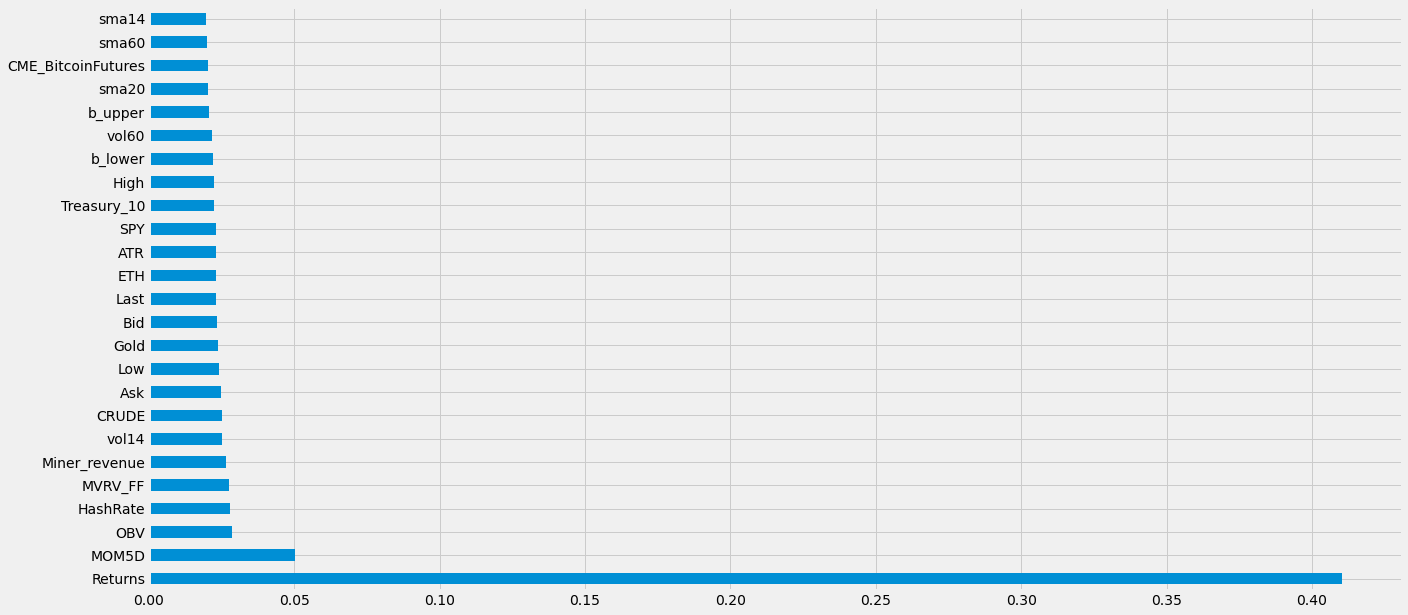

In [20]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.keys())).plot(kind='barh')
plt.show()

Note that this methodology returns returns as more relevant features to Returns and MOM5D, and to a lesser extent to OBV.

We are left with the 5 best features for this last technique.

In [21]:
best_feat=list(featureScores.nlargest(5,'Score')['Specs'])
for i in list(featureScores['Specs']):
	if(i not in best_feat):
		X.drop(i,axis=1,inplace=True)

In [22]:
X.head()

,CRUDE,Returns,sma60,MOM5D,MVRV_FF
Date,,,,,
2021-03-15,0.903367,0.366795,1.000000,0.550266,0.631542
2021-03-12,0.905296,0.592664,0.973884,0.969812,0.662347
2021-03-11,0.908892,0.555985,0.966279,0.865844,0.676488
2021-03-10,0.895037,0.615830,0.960272,0.838613,0.660014
2021-03-09,0.891266,0.577220,0.954790,0.592185,0.645159


### <font color= darkblue> Correlation Matrix
    
Correlation (Pearson's) is a measure of linear dependence between two quantitative random variables. In a less formal way, we can define Pearson's correlation coefficient as an index that can be used to measure the degree of relationship of two variables as long as they are both quantitative and continuous. In this case, we will analyze the correlation between the features of our dataset. The objective will be to stay with features that are not (too) correlated, so that they offer different information.

Let's check the correlation of the remaining features.

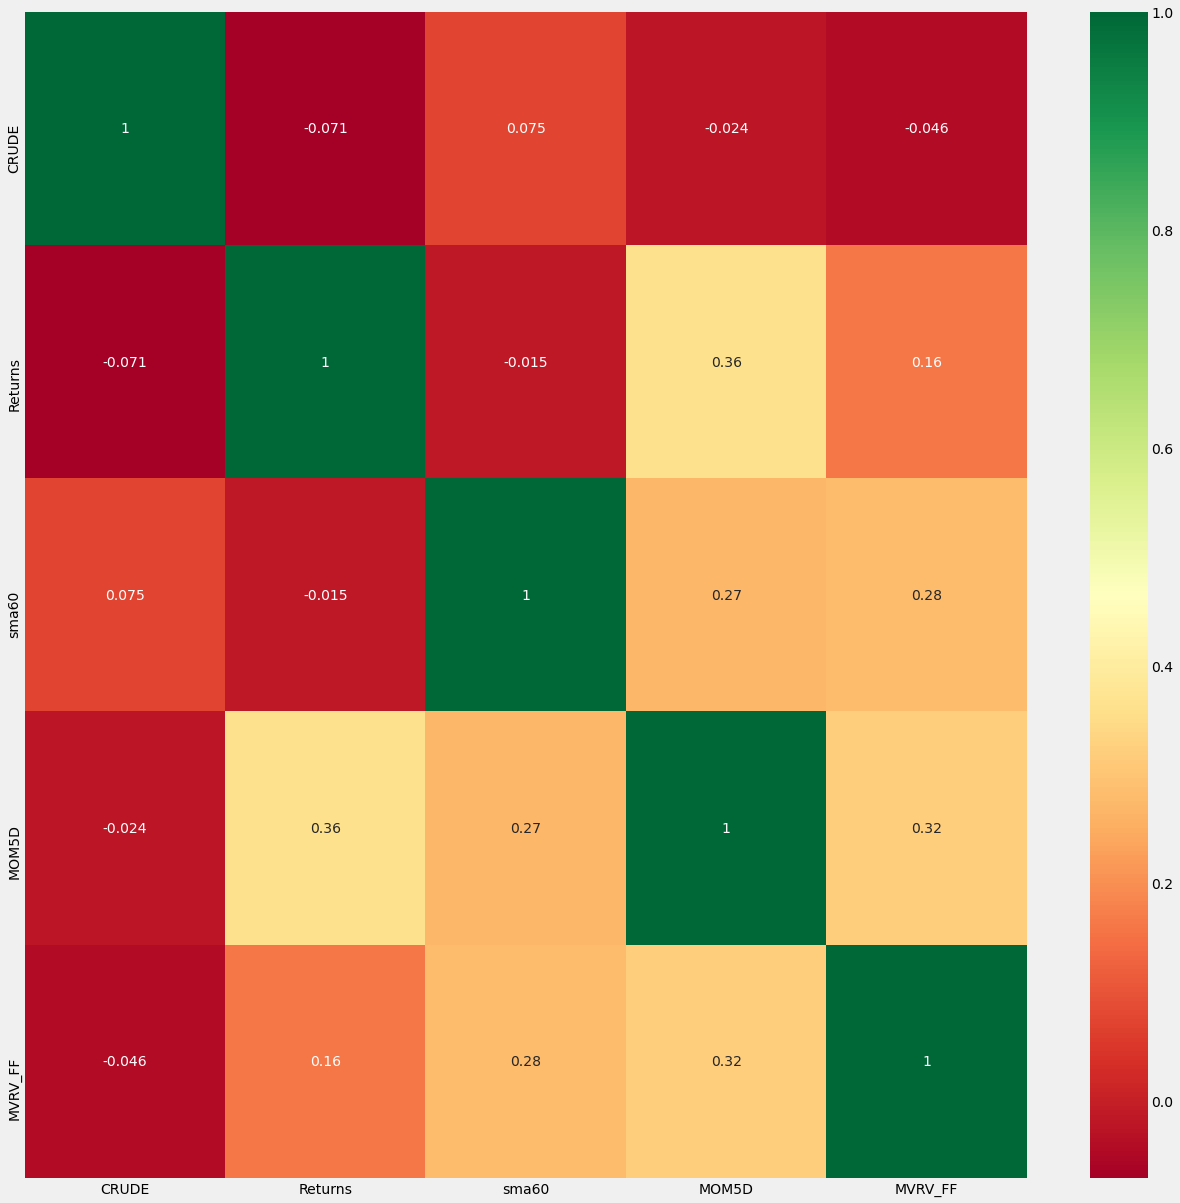

In [23]:
# Correlation Matrix with Heatmap
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

It can be seen that there is a low correlation between almost all the features, which indicates that in some sense each variable is providing different information.

### <font color= darkblue> Split and normalization of the dataset

Feature scaling can help algorithms converge to local / global minima efficiently. In addition, it can happen that the measures used in the features vary a lot in magnitude from one to another, which may '' confuse '' the model, interpreting this that one feature is more relevant than the others just by using larger numbers. For example, if one does not normalize, it could happen that in the process of updating the weights in neural networks by means of the gradient descent method, the update generates steps that are too large, preventing the method from converging.

We will use the MinMaxScaler scaler from the Sci-kit Learn library.

#### <font color= darkblue>Spliting the data</font>

A critical part of machine learning is having a clear distinction between the data that will be used to train the model and the data that will be used to assess the predictive power of the model. Therefore, we will use the classic Train / Test split, with a Train set of 70% of the data.

Some of the machine learning methods that we will use also allow us to specify if we want to consider a Validation Set in the model training.

In [24]:
# 70% train/test split
split = int(len(X) * 0.7)

# We transform Y to a binary classification problem's values (0 y 1)
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 
# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Column_A'],index=Y.index) 

# Create train data set
# We have to twist the dataset
X_train, y_train = X[::-1][:split], Y[::-1][:split]
# Test data after train split
X_test, y_test = X[::-1][split:], Y[::-1][split:]


# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X[::-1].iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[::-1][:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[::-1][split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[::-1][split:].index)

#### <font color= darkblue> Reshaping the Data
    
For the LSTM neural network we need to change the data format since the network consumes data in 3 dimensions of the form: quantity of data, quantity of time-steps and quantity of features.

In [25]:
# Reshaping the Data for LSTM
# reshaping into 3D Array
X_train_LSTM=np.array(scaled_X_train).reshape(len(scaled_X_train),1,len(list(X.keys()))) # len(scaled_train_data) samples; 1 timesteps per sample; 9 features per timestep or 1 samples; len(scaled_train_data) timesteps; 9 features per timestep?
X_test_LSTM=np.array(scaled_X_test).reshape(len(scaled_X_test),1,len(list(X.keys())))

\clearpage

# <font color= darkblue> Part II:  Building Models</font> 

Next, we will build, train, and test different data science models for the problem at hand.

For each model of them we will show their '' score '', that is, their performance, in the test set.

In the training of each model we will use the Python time function to measure the time it takes for each model to study the train set.

In addition, for those methods that calculate coefficients, we will also show the values ​​of the estimated coefficients, so as to interpret which features are the most important for that model. Note that this last idea could have been used as a feature selection method or, at least, as a technique to interpret the relevance of the features according to each model. Again, in order not to extend ourselves too much and to be able to cover the things that interest us, we decided to do the analysis directly on the subgroup of features that we chose, but this other idea is worth mentioning.

We will not delve into the operation of the methods in depth since it is not the intention of the work, we will only mention the main ideas. For those who are interested in more information, we suggest you visit the bibliography.

We define the empty list runtimes in which we will save all the training times.

In [26]:
runtimes=[]

### <font color= darkblue> 1. Naive Bayes
    
The Naive Bayes method is a supervised learning algorithm based on the application of the Bayes theorem with the "naive" or innocent assumption of conditional independence between pairs of features given the value of the class of the response variable.

In abstract, the probability model for a classifier is
$$ p (C | F_1, \dots, F_n), $$
on a discrete dependent variable $ C $. This variable is conditioned by several independent variables $ F_1, \dots, F_n $. By Bayes' theorem we have
$$ p (C | F_1, \dots, F_n) = \frac{p (C) p (F_1, \dots, F_n | C)}{p (F_1, \dots, F_n)}. $$

Since we are assuming independence, by the definition of conditional probability we have
$$ p (C, F_1, \dots, F_n) = p (C) \prod p (F_i | C).$$
    
Later
$$ p (C | F_1, \dots, F_n) = \frac{1}{Z} \prod p (F_i | C), $$
where $ Z $ is a factor that depends only on $ F_1, \dots, F_n $.

In [27]:
mnb = MultinomialNB()

start_mnb = time.time()
mnb.fit(X_train, y_train)
end_mnb = time.time()
mnb_runtime=end_mnb - start_mnb

print('Runtime:',mnb_runtime)
print("score on test: %.3f"  %mnb.score(X_test, y_test))
print("score on train: %.3f" %mnb.score(X_train, y_train))

Runtime: 0.013918876647949219
score on test: 0.567
score on train: 0.576


In [28]:
runtimes.append(mnb_runtime)

We organize the features in decreasing order of importance, according to the value of the coefficient assigned by the model for each feature.

In [29]:
coef=list(mnb.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> -1.459
CRUDE --> -1.531
MOM5D --> -1.555
sma60 --> -1.655
MVRV_FF --> -1.904


### <font color= darkblue> 2. Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary response variable through the multiple linear model.

In this model, the log-odds for the value '' +1 '' is a linear combination of the predictors. The function that converts the log of the probability to a probability is called the logistic function, hence the name. The unit of measurement of the log-odds scale is called the logit (logistic unit).

The model is then
$$ logit (P (Y = 1 | X)) = \beta_0 + \sum \beta_i X_i. $$

In [30]:
lr=LogisticRegression(max_iter=1000)

start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

Runtime: 0.14505386352539062
score on test: 0.927
score on train: 0.921


In [31]:
runtimes.append(lr_runtime)

In [32]:
coef=list(lr.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 10.576
MOM5D --> 1.571
MVRV_FF --> 0.459
CRUDE --> 0.041
sma60 --> -0.524


### <font color= darkblue> 3. K-Nearest Neighbours

The k-NN classification method is a method that is based on classifying according to the plurality of the votes of the "closest" neighbors $ K $ of the point of the sample that we want to classify and for a certain notion of distance. For example, if $ K = 1 $ the object will be classified as the class of its closest neighbor.

As this algorithm is based on a distance, if the features are represented in different units or in very different scales, the normalization of the data can dramatically improve the performance of the method.

A peculiarity of the K-NN algorithm is its sensitivity to the local structure of the data.

In [33]:
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()
knn_runtime=end_knn - start_knn

print('Runtime:',knn_runtime)
print("score on test: %.3f" % knn.score(X_test, y_test))
print("score on train: %.3f" % knn.score(X_train, y_train))

Runtime: 0.01577138900756836
score on test: 0.713
score on train: 0.937


In [34]:
runtimes.append(knn_runtime)

### <font color= darkblue> 4. Support Vector Machine
    
SVM is a binary classification method that interprets the data as points in a $ p $ -dimensional space, with $ p $ the amount of features considered, and what it seeks is to separate them by means of a hyperplane, that is, by means of a subspace of the ambient space of dimension $ p-1 $. As in general there are infinite hyperplanes that separate the data, a good choice is the one with the greatest separation, or margin, between the two classes. That is, the hyperplane that maximizes its distance to the closest point in the sample is chosen.

A prior notion of the Perceptron technique is recommended, since SVM can be thought of as an improvement and generalization of it.

In [35]:
svm=LinearSVC(C=100)

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()
svm_runtime=end_svm - start_svm

print('Runtime:',svm_runtime)
print("score on test: %.3f" % svm.score(X_test, y_test))
print("score on train: %.3f" % svm.score(X_train, y_train))

Runtime: 0.010956764221191406
score on test: 0.990
score on train: 0.997


In [36]:
runtimes.append(svm_runtime)

In [37]:
coef=list(svm.fit(X_train, y_train).coef_[0])
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 61.340
MOM5D --> 0.540
sma60 --> 0.132
MVRV_FF --> 0.037
CRUDE --> -0.084


### <font color= darkblue> 5. Decision Tree Classifier
    
A decision tree is a structure made up of nodes, branches and leaves, in which each node represents a test on an attribute (for example that $ X_1> 58 $), each branch represents the result of the test and each leaf represents the label or class for the data considered. The path from the root to the leaves represents classification rules.

The decision tree can be linearized into decision rules, where the outcome is the contents of the leaf node, and the conditions along the path form a conjunction in the if clause. In general, the rules have the form:

if condition1 and condition2 and condition3 then outcome.

Namely, a Decision Tree is a non-parametric supervised learning method used for classification and regression which goal is to create a model that predicts the value of a target variable by learning simple decision rules (if-else) inferred from the data features.

In [38]:
clf = DecisionTreeClassifier()

start_clf = time.time()
clf.fit(X_train, y_train)
end_clf = time.time()
clf_runtime=end_clf - start_clf

print('Runtime:',clf_runtime)
print("score on test: %.3f"  % clf.score(X_test, y_test))
print("score on train: %.3f" % clf.score(X_train, y_train))

Runtime: 0.014547109603881836
score on test: 1.000
score on train: 1.000


In [39]:
runtimes.append(clf_runtime)

In [40]:
coef=list(clf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 1.000
MVRV_FF --> 0.000
MOM5D --> 0.000
sma60 --> 0.000
CRUDE --> 0.000


Applying a single decision tree to this feature rich dataset leads to massive overfitting. Indeed, an accuracy of 100\% means it has remembered exactly the training dataset and is therefore generalising poorly on the test data. What we can see here is one of the cons of single decision tree which can’t handle data with too many features.

However, this problem can be avoided by fine-tuning the model parameters or by using an ensemble learning technique such as Random Forest. The following methods show examples of this.

In the bibliography we leave a link with an article that deals in depth with the correct setting of the parameters of a classifier by decision tree.

### <font color= darkblue> 6. Bagging Decision Tree (Ensemble Learning I)
    
Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. 

When a decision tree overfits, applying an ensemble learning algorithm like bagging might improve the quality of the prediction model. 

In bagging, the training data is increased by taking bootstraps from the training data. This means multiple samples are taken (with replacement) from the training data and the model is trained on these sub-datasets. The final prediction is the average over all predictions from each bootstrap sample.
    
Strictly speaking, we must be a bit careful about using this type of models that involve the bootstrap technique when dealing with time series, since the classic bootstrap resampling does not reflect the temporal dependence of these types of data. However, we wanted to show it to illustrate one more step in the methods of ensemble learning.

We'll cover this time series bootstrap topic later.

In [41]:
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)

start_bg = time.time()
bg.fit(X_train, y_train)
end_bg = time.time()
bg_runtime=end_bg - start_bg

print('Runtime:',bg_runtime)
print("score on test: %.3f" % bg.score(X_test, y_test))
print("score on train: %.3f" % bg.score(X_train, y_train))

Runtime: 0.045135498046875
score on test: 1.000
score on train: 1.000


In [42]:
runtimes.append(bg_runtime)

### <font color= darkblue> 7. Boosting Decision Tree (Ensemble Learning II)
    
In machine learning, boosting is an ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.

"Can a set of weak learners create a single strong learner?" [Kearns and Valiant (1988, 1989)] 

A weak learner is defined to be a classifier that is only slightly correlated with the true classification (it can label examples better than random guessing). In contrast, a strong learner is a classifier that is arbitrarily well-correlated with the true classification.

While boosting is not algorithmically constrained, most boosting algorithms consist of iteratively learning weak classifiers with respect to a distribution and adding them to a final strong classifier. When they are added, they are weighted in a way that is related to the weak learners' accuracy. After a weak learner is added, the data weights are readjusted, known as "re-weighting". Misclassified input data gain a higher weight and examples that are classified correctly lose weight. Thus, future weak learners focus more on the examples that previous weak learners misclassified.

In general, we cannot use Boosting to improve a fully overfitted model with 100 \% accuracy. To apply this method to our decision tree above, we have to twist it a bit.

In [43]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)

start_adb = time.time()
adb.fit(X_train, y_train)
end_adb = time.time()
adb_runtime=end_adb - start_adb

print('Runtime:',adb_runtime)
print("score on test: %.3f" % adb.score(X_test, y_test))
print("score on train: %.3f" % adb.score(X_train, y_train))

Runtime: 0.017202377319335938
score on test: 1.000
score on train: 1.000


In [44]:
runtimes.append(adb_runtime)

In [45]:
coef=list(adb.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 1.000
MVRV_FF --> 0.000
MOM5D --> 0.000
sma60 --> 0.000
CRUDE --> 0.000


### <font color= darkblue> 8. Random Forest (Ensemble Learning III)
    
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

ie. the Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. We found out that max\_depth=9 is a good value for this feature-rich dataset.

In [46]:
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()
rf_runtime=end_rf - start_rf

print('Runtime:',rf_runtime)
print("score on test: %.3f" % rf.score(X_test, y_test))
print("score on train: %.3f" % rf.score(X_train, y_train))

Runtime: 0.05503654479980469
score on test: 1.000
score on train: 1.000


In [47]:
runtimes.append(rf_runtime)

In [48]:
coef=list(rf.fit(X_train, y_train).feature_importances_)
max_coef_index=list(np.argsort(coef)[::-1])
for i in max_coef_index:
    print(list(X_train.columns)[i]+' --> %.3f' %coef[i])

Returns --> 0.915
MOM5D --> 0.049
MVRV_FF --> 0.016
sma60 --> 0.011
CRUDE --> 0.009


### <font color= darkblue> 9. Voting Classifier (Ensemble Learning IV)
    
This classifier from the ensemble learning toolbox evaluates different classifiers and selects the best out of it.

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses

So let’s use this classifier to combine some of the models we had so far and apply the Voting Classifier on

\begin{itemize}
\item Naive Bayes;
\item Logistic Regression;
\item Random Forest;
\item Support Vector Machine.
\end{itemize}

In [49]:
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')

start_evc = time.time()
evc.fit(X_train, y_train)
end_evc = time.time()
evc_runtime=end_evc - start_evc

print('Runtime:',evc_runtime)
print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

Runtime: 0.07277393341064453
score on test: 0.98
score on train: 0.995702005730659


In [50]:
runtimes.append(evc_runtime)

### <font color= darkblue> 10. PPR

Projection pursuit regression (PPR) is a statistical model developed by Jerome H. Friedman and Werner Stuetzle which is an extension of additive models. This model adapts the additive models in that it first projects the data matrix of explanatory variables in the optimal direction before applying smoothing functions to these explanatory variables.

The model consists of linear combinations of ridge functions: non-linear transformations of linear combinations of the explanatory variables.

For a given set of data $\{(y_{i},x_{i})\}_{i=1}^{n}\}$, the goal is to minimize the error function

$$\min _{f_{j},\beta _{j}}S=\sum _{i=1}^{n}\left[y_{i}-\sum _{j=1}^{r}f_{j}(\beta _{j}^{\mathrm {T} }x_{i})\right]^{2},$$

over the functions $f_{j}$ and vectors $\beta _{j}$. 

Previously-fitted pairs can be readjusted after new fit-pairs are determined by an algorithm known as backfitting, which entails reconsidering a previous pair, recalculating the residual given how other pairs have changed, refitting to account for that new information, and then cycling through all fit-pairs this way until parameters converge.

The PPR model is a universal estimator, as it can approximate any continuous function in $\mathbb{R}^p$.

The Python skpp library and created by pavelkomarov (see bibliography), offers not only the PPR but the Projection Pursuit Classifier whose definition ends up invoking the PPR but for a modification of the original problem.

In [51]:
# r: The number of terms in the underlying additive model. The input will be put through r projections, r functions of those projections, and then multiplication by r output vectors to determine output.
#ppr = ProjectionPursuitRegressor(r=10)
ppr = ProjectionPursuitClassifier(r=10)

start_ppr = time.time()
ppr.fit(X_train, y_train)
end_ppr = time.time()
ppr_runtime=end_ppr - start_ppr

print('Runtime:',ppr_runtime)
ppr_prediction=ppr.predict(X_test)

Runtime: 3.0055580139160156


In [52]:
runtimes.append(ppr_runtime)

### <font color= darkblue> 11. Neural Network and Deep Learning
    
It is assumed that the reader is aware of the basic notions about ANNs and we will only mention that deep learning is about neural networks that have at least two hidden layers that are used to progressively extract higher-level characteristics from the training data.

We will use two types of networks: MLP (multi-layer perceptron) and LSTM.

When building both networks we will use the following hyperparameters:

\begin{itemize}
    \item optimizer=’adam’; 
    \item metrics=’binary accuracy’; 
    \item loss=’binary crossentropy’; 
    \item activation=’relu’ for the first dense layer (for the LSTM case) and activation=’sigmoid’ for the second, since it is a binary classification problem.
\end{itemize}
    
For training we have used
\begin{itemize}
    \item For MLP
        \begin{itemize} 
            \item batch\_size=1 (stochastic gradient descent);
            \item epochs=100;
            \item validation\_split=0.33 which also helps us to show how the network improves as epochs increase;
        \end{itemize}
    \item For LSTM: 
        \begin{itemize}
            \item batch\_size=len(X\_train\_LSTM)
            \item epochs=200;
            \item validation\_split=0.33.
        \end{itemize}
\end{itemize}

When building neural networks, we must be careful not to use too many layers and neurons, specifically if the data set is not particularly large. Many parameters will inevitably improve in-sample performance (on the train set) but will also lead to the risk of overfitting. Additionally, the training process will require much more computational power, thus increasing the risk of non-convergence.

Another important reason to avoid the use of overly complex networks, and to use methods that reduce overfitting such as dropout, is the fact that we are training with financial time series that often have noisy data (that is, patterns that are not essential but merely concomitants).

### <font color= darkblue> Multilayer Perceptron (MLP)
    
MLP consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. With the exception of the input nodes, each node is a neuron that uses non-linear activation functions.

MLP uses a supervised learning technique called backpropagation for its training. These multiple layers and non-linear activation functions are the characteristics that distinguish MLP from the classical perceptron. Also, MLP can distinguish data that is not linearly separable.

We define a function to build the model with a specific number of layers, each with a predefined number of neurons. This function is useful in that it allows you to easily change network hyperparameters (such as optimizer, trigger function, etc.) without having to rewrite all the code. The function returns the compiled model.

In [53]:
# MLP: mirar https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/ + https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# define model

def model_MLP(optimizer,activation,loss,metrics):
  model = Sequential()

  model.add(Dense(64,  activation = activation))
  
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

MLP=model_MLP(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])  

#### <font color= darkblue> Fitting the Model</font>

The classic Stochastic gradient descent (SGD) method has been enhanced by various adaptive moment estimation (ADAM) techniques that build on AdaGrad and RMSProp \& others. There is also some *Practical Advice for Building Deep Neural Networks* by Matt H and Daniel R that explains why the ADAM optimiser, ReLU activation function and variance scaled initialisation are preferred.
 
 In fact, while Stochastic Gradient Descent is used in many Neural Network problems, it has the problem of converging to a local minimum. This of course presents a problem considering Bitcoin price. Some other nice optimizers are variations of adaptive learning algorithms, like Adam, Adagrad, and RMSProp. Adam was found to work slightly better than the rest.

In [54]:
start_MLP = time.time()
history_MLP=MLP.fit(X_train, y_train, batch_size=1, epochs=100, verbose=0, validation_split=0.33, shuffle=False)
end_MLP = time.time()
MLP_runtime=end_MLP - start_MLP

print('Runtime:',MLP_runtime)

Runtime: 37.85002017021179


In [55]:
runtimes.append(MLP_runtime)

In [56]:
print(MLP.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 64)                   384       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
None


#### <font color= darkblue> Visualización de precisión y pérdida en los conjuntos de entrenamiento y validación

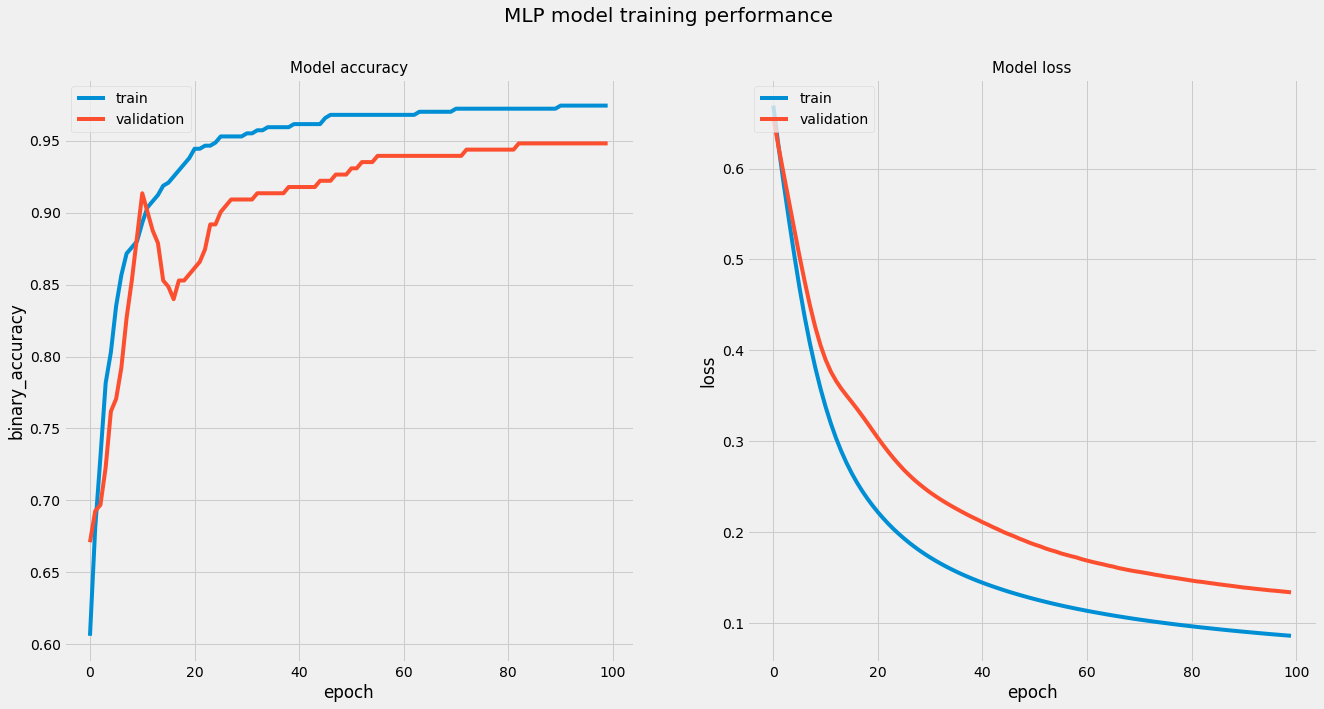

In [57]:
# MLP
fig, axs = plt.subplots(1,2)
fig.suptitle('MLP model training performance', fontsize=20)
axs[0].plot(history_MLP.history['binary_accuracy'])
axs[0].plot(history_MLP.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_MLP.history['loss'])
axs[1].plot(history_MLP.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color= darkblue> LSTM

The Long Short-Term Memory (LSTM) network is a recurrent neural network that is trained using Backpropagation Through Time and that overcomes the vanishing / exploding gradient problem.

Its architecture is once again ideal networks to process sequential data such as time series.

Instead of hidden layers, LSTM networks have memory blocks. Such a block has components that make it smarter than the classical hidden layers and provide it with a notion of short and long term memory. These memory blocks are made up of logic gates that manage the state of the block and its output. A block operates on an input sequence and each gate uses sigmoid activation functions to control whether they activate or not, causing state changes and adding new information.

The blocks are made up of three types of logic gates:

\begin{itemize}
\item Forget Gate: it decides what information to remove from the block;
\item Input Gate: it decides which input weight values to update in memory state;
\item Output Gate: it decides what to return to the output based on the input and the memory state of the block.
\end{itemize}

Each memory unit is like a little state machine where the gates have weights that are learned during training.

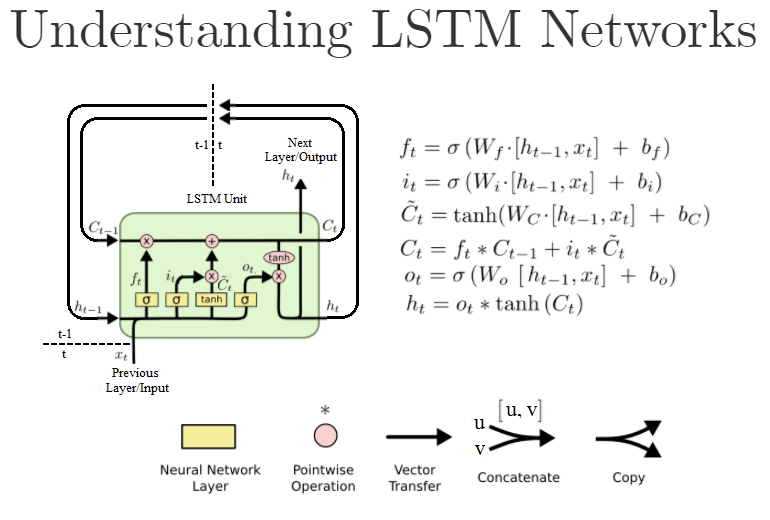

In [58]:
from IPython.display import Image
Image("img/LSTM.png")

#### <font color= darkblue> Define Model
    
First, we define the LSTM network by initializing the Keras Sequential model. Then we will add two LSTM layers and adjust the dropout to improve the performance of the model. Finally, we will add two dense layers for the output.

Note that other hyperparameters to modify to improve performance are the number of epochs and the batch size. We have noticed that a batch \_size = len (X\_train\_LSTM) and epochs = 200 return a good model.

Next, we will compile the defined model.

### <font color= darkblue>Building an LSTM Model </font>

As in the previous model, we define a function to build the model based on the LSTM network. In this case we add a dropout percentage (drop \ _pct) which is a regularization method that adds information to solve badly conditioned problems or to reduce overfitting.

In [59]:
def model_LSTM_(optimizer,activation,loss,metrics):
  model = Sequential()

  model.add(LSTM(units=256, input_shape = (X_train_LSTM.shape[1],X_train_LSTM.shape[2]), return_sequences=True)) 
  model.add(Dropout(0.4, seed=seed_value))

  model.add(LSTM(units=256, return_sequences=True))
  model.add(Dropout(0.4, seed=seed_value))

  model.add(LSTM(units=64, return_sequences=False))
  model.add(Dropout(0.4, seed=seed_value))

  model.add(Dense(64,  activation = activation))
  
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

# Define the Model
model_LSTM=model_LSTM_(optimizer='adam',activation='relu',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [60]:
start_LSTM = time.time()
history_LSTM=model_LSTM.fit(X_train_LSTM, y_train, batch_size=len(X_train_LSTM), epochs=200, verbose=0, validation_split=0.33, shuffle=False)
end_LSTM = time.time()
LSTM_runtime=end_LSTM - start_LSTM

print('Runtime:',LSTM_runtime)

Runtime: 19.837829113006592


In [61]:
runtimes.append(LSTM_runtime)

In [62]:
print(model_LSTM.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            268288    
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

#### <font color= darkblue> Visualización de precisión y pérdida en los conjuntos de entrenamiento y validación

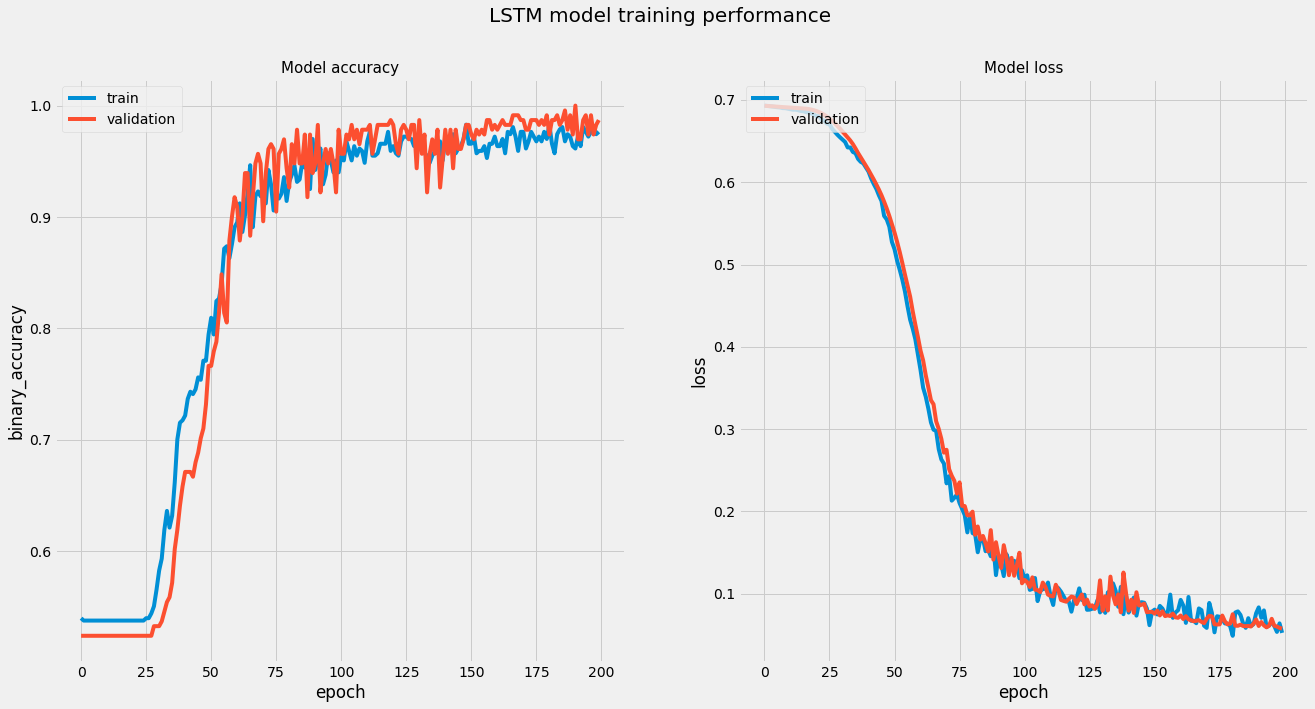

In [63]:
# LSTM
fig, axs = plt.subplots(1,2)
fig.suptitle('LSTM model training performance', fontsize=20)
axs[0].plot(history_LSTM.history['binary_accuracy'])
axs[0].plot(history_LSTM.history['val_binary_accuracy'])
axs[0].set_title('Model accuracy', fontsize=15)
axs[0].set_ylabel('binary_accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(history_LSTM.history['loss'])
axs[1].plot(history_LSTM.history['val_loss'])
axs[1].set_title('Model loss', fontsize=15)
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

### <font color= darkblue> Prediction
    
Now that we have both networks trained, we need to test them in the test set.

As measures of the performance of both networks we will use the binary_accuracy (number of correct predictions divided by the total amount of data in the response variable) and the binary_crossentropy (it is the average of the loss of categorical cross entropy in many tasks of two categories).

In [64]:
# MLP
y_pred_MLP=MLP.predict(X_test, batch_size=1)
# LSTM
y_pred_LSTM=model_LSTM.predict(X_test_LSTM, batch_size=1)

#### <font color= darkblue> Prediction metrics on the test set

In [65]:
# MLP
results_MLP=MLP.evaluate(X_test, y_test)
print('MLP: [binary_crossentropy, binary_accuracy] =', results_MLP)

10/10 [==============================] - 0s 2ms/step - loss: 0.2453 - binary_accuracy: 0.8700
MLP: [binary_crossentropy, binary_accuracy] = [0.24527430534362793, 0.8700000047683716]


In [66]:
# LSTM
results_LSTM=model_LSTM.evaluate(X_test_LSTM, y_test)
print('LSTM: [binary_crossentropy, binary_accuracy] =', results_LSTM)

10/10 [==============================] - 0s 3ms/step - loss: 0.0614 - binary_accuracy: 0.9733
LSTM: [binary_crossentropy, binary_accuracy] = [0.06144692748785019, 0.9733333587646484]


The LSTM network is seen to be far superior to the MLP, and overall it is among the best models considered.

### <font color= darkblue> 12. Model Averaging Ensemble

To finish with the models, we show one last aspect.

We have seen that many of the models we tested were overfitted. This is a common problem in time series and is usually caused by the correlation that exists between the train set and the test set, due to the time dependence inherent in the series.

To improve this situation we will perform an averaging ensemble combining two resampling techniques: block bootstraping and Time Series cross-validation.

#### <font color= darkblue> Block Bootstrap
    
The basic idea behind the bootstrap is to estimate the quantities or characteristics that interest us by doing a resampling with replacement of the original sample. When dealing with time-correlated data, simple resampling is not appropriate because in this way we will not be able to replicate the time dependency structure inherent in the data. For this reason, other bootstrap techniques have been developed for time series. One of the most common techniques is known as block bootstrap.

The bootstrap block tries to create new time series, with the same dependency as the original data, using the resample idea from before but no longer taking one data per iteration but separating the data into blocks and taking one block per iteration, with replacement. In this way, by taking blocks instead of isolated data, we retain the inherent time dependency.

In [67]:
len(X_train)

698

In [68]:
# creo muestras block bootstraps con bloques de longitud n=100
bs = StationaryBootstrap(100, X_train, y=y_train)
scores=[]
X_train_bs=[X_train]
y_train_bs=[y_train]
for data in bs.bootstrap(50):
    bs_X = data[0][0]
    bs_y = data[1]['y']
    # para cada muestra creada hago el split train/test
    #bs_X_train, bs_X_val, bs_y_train, bs_y_val = train_test_split(bs_X, bs_y, test_size=0.33, shuffle=False)
    X_train_bs.append(bs_X)
    #X_val.append(bs_X_val)
    y_train_bs.append(bs_y)
    #y_val.append(bs_y_val)
    # POR QUÉ NO APPENDEA EL VALIDATION SET?
X_train_bs = np.concatenate(X_train_bs);# X_val = np.concatenate(X_val)
y_train_bs = np.concatenate(y_train_bs);# y_val = np.concatenate(y_val)
X_train_bs=pd.DataFrame(X_train_bs,columns=X.columns)
y_train_bs=pd.DataFrame(y_train_bs,columns=['Sign'])

In [69]:
len(X_train_bs)

35598

In [70]:
X_train_bs.head(),y_train_bs.head()

(      CRUDE   Returns     sma60     MOM5D   MVRV_FF
 0  0.351830  0.408313  0.000000  0.413476  0.439516
 1  0.338253  0.520782  0.000377  0.419351  0.434044
 2  0.340024  0.457213  0.001276  0.411623  0.434606
 3  0.338843  0.425428  0.001562  0.412506  0.430302
 4  0.333530  0.386308  0.001854  0.406022  0.447226,
    Sign
 0     1
 1     1
 2     1
 3     1
 4     0)

#### <font color= darkblue> Time Series cross-validation
    
Next, we will perform a Time Series cross-validation on the new (much larger) set of bootstrap samples that we generate.
    
This technique is a variation of KFold and provides indices to do the split train/test of the observed time series in a fixed time interval. In the k-th split, we will have k folds as the train set and the (k + 1) -th fold will be the test set.

First, we will define a cross\_model() function to create and fit a list of models in the crossvalidation samples.

In [71]:
# Realizamos un cross validation sobre un modelo fijo
def cross_model(model,X,Y):
    tscv = TimeSeriesSplit()
    models=[]
    for train_index, test_index in tscv.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X__train, X__test = X.iloc[train_index], X.iloc[test_index]
        y__train, y__test = Y.iloc[train_index], Y.iloc[test_index]
        # if needed, do preprocessing here

        model.fit(X__train,y__train)
        
        models.append(model)
    return models
def cross_scores(model,X,Y):
    tscv = TimeSeriesSplit()
    scores=[]
    for train_index, test_index in tscv.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
        X__train, X__test = X.iloc[train_index], X.iloc[test_index]
        y__train, y__test = Y.iloc[train_index], Y.iloc[test_index]
        # if needed, do preprocessing here

        model.fit(X__train,y__train)

        preds = model.predict(X__test)

        # accuracy for the current fold only    
        r2score = model.score(X__test,y__test)

        scores.append(r2score)
        
    # this is the average accuracy over all folds
    average_r2score = np.mean(scores)
    return average_r2score

#### <font color= darkblue> Averaging Ensemble
    
Next, we define the ensemble\_predictions () function that takes a list of models and a set of data, and returns the response variable predicted by the assembler.

One can assemble the (binary) predictions from multiple models by taking the mean of the vector of predictions from the models and then, if necessary, converting the resulting vector to have values in $ \{0,1 \} $ (for example using LabelEncoder).

In [72]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(models, X):
    # make predictions
    yhats = [model.predict(X) for model in models]
    yhats = np.array(yhats)
    # mean across ensemble members
    mean = np.mean(yhats, axis=0)
    encoder = LabelEncoder() 
    return encoder.fit_transform(mean)

Let's look at this ensemble technique for examples for the Naive Bayes model.

In [73]:
modelos=[mnb,lr,knn,svm,clf,bg,adb,rf,ppr,MLP,LSTM]
modelos_nom=['mnb','lr','knn','svm','clf','bg','adb','rf','ppr','MLP','LSTM']

In [74]:
modelos

[MultinomialNB(),
 LogisticRegression(max_iter=1000),
 KNeighborsClassifier(algorithm='brute', n_jobs=-1),
 LinearSVC(C=100),
 DecisionTreeClassifier(),
 BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                          min_samples_split=10),
                    learning_rate=0.6, n_estimators=10),
 RandomForestClassifier(max_depth=9, n_estimators=30),
 ProjectionPursuitClassifier(),
 tensorflow.python.keras.layers.recurrent_v2.LSTM]

In [75]:
model=modelos[4] # We choose MultinomialNB()
# cross sample + ensemble
models=cross_model(model,X_train,y_train) 
preds = ensemble_predictions(models,X_test)
print('score con muestra cross+ensemble: %.3f' % accuracy_score(y_test,preds))
# bootstraped sample
model.fit(X_train_bs,y_train_bs)
print('score con muestra bts: %.3f' % accuracy_score(y_test,model.predict(X_test)))#cross_scores(model,X_test,y_test))#
# original sample
model.fit(X_train,y_train)
print('score con muestra original: %.3f' % accuracy_score(y_test,model.predict(X_test)))

score con muestra cross+ensemble: 1.000
score con muestra bts: 1.000
score con muestra original: 1.000


There is no great improvement over the original sample.

#### <font color= darkblue> Prediction Scores
    
We can estimate the performance of the ensemble of a certain fixed size $ n $, by selecting the required number of models from the list of all models, calling the ensemble_predictions () function to make the prediction, and then calculating the precision of the prediction compared to the actual values. The function evaluate\_n\_members () implements this idea.

In [76]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(models, n_members, X, y):
    # select a subset of members
    subset = models[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, X)
    # calculate accuracy
    return accuracy_score(y, yhat)

We then save the ensemble score of each size for a later graph, and the score of each individual model and the average performance obtained.

In [77]:
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(models)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(models, i, X_test, y_test)
    # evaluate the i'th model standalone
    single_score = models[i-1].score(X_test, y_test)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))

> 1: single=1.000, ensemble=1.000
> 2: single=1.000, ensemble=1.000
> 3: single=1.000, ensemble=1.000
> 4: single=1.000, ensemble=1.000
> 5: single=1.000, ensemble=1.000
Accuracy 1.000 (0.000)


No improvement is observed using the ensemble method.

\clearpage

# <font color= darkblue> Comparación de modelos

Let's compare the models according to their prediction score, '' score '', and according to their ROC curves.

### <font color= darkblue> Score
    
Let's list the performance of the models.

In [78]:
scores=[]
for i in range(0,len(modelos_nom)-2):
    aux=modelos[i].score(X_test,y_test)
    scores.append(aux)
    print('El modelo '+modelos_nom[i]+' tiene un score de: %.3f' % aux)
scores.append(results_MLP[1])
print('El modelo '+modelos_nom[9]+' tiene un score de: %.3f' % results_MLP[1])
scores.append(results_LSTM[1])
print('El modelo '+modelos_nom[10]+' tiene un score de: %.3f' % results_LSTM[1])

El modelo mnb tiene un score de: 0.567
El modelo lr tiene un score de: 0.927
El modelo knn tiene un score de: 0.713
El modelo svm tiene un score de: 0.993
El modelo clf tiene un score de: 1.000
El modelo bg tiene un score de: 1.000
El modelo adb tiene un score de: 1.000
El modelo rf tiene un score de: 1.000
El modelo ppr tiene un score de: 0.683
El modelo MLP tiene un score de: 0.870
El modelo LSTM tiene un score de: 0.973


### <font color= darkblue> ROCs Curves

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 - specificity). 

It can also be thought of as a plot of the power as a function of the Type I Error of the decision rule. The ROC curve is thus the sensitivity or recall as a function of fall-out. 

ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution.

To be able to graph the ROC curves simultaneously, we will define a list with the predictions of all the models on the test set.

In [79]:
predicciones=pd.DataFrame()
for i in range(0,len(modelos)-1):
    predicciones[modelos_nom[i]]=np.where(modelos[i].predict(X_test)>=0.5,1,0)
predicciones[modelos_nom[10]]=np.where(model_LSTM.predict(X_test_LSTM, batch_size=1)>=0.5,1,0)
predicciones.index=X[::-1][split:].index

In [80]:
predicciones.head()

,mnb,lr,knn,svm,clf,bg,adb,rf,ppr,MLP,LSTM
Date,,,,,,,,,,,
2020-01-03,1,0,0,0,0,0,0,0,0,0,0
2020-01-06,1,1,1,1,1,1,1,1,1,1,1
2020-01-07,1,1,1,1,1,1,1,1,1,1,1
2020-01-08,1,1,1,1,1,1,1,1,1,1,1
2020-01-09,1,0,0,0,0,0,0,0,0,0,0


In [81]:
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc = []
for i in range(0,len(modelos_nom)):
    lr_auc.append(np.array(roc_auc_score(y_test, predicciones[modelos_nom[i]])))

We plot the ROC curves. We will make the graphics in two parts for a better visualization.

No Skill: ROC AUC=0.500
mnb: ROC AUC=0.529
lr: ROC AUC=0.930
knn: ROC AUC=0.713
svm: ROC AUC=0.992
clf: ROC AUC=1.000
bg: ROC AUC=1.000


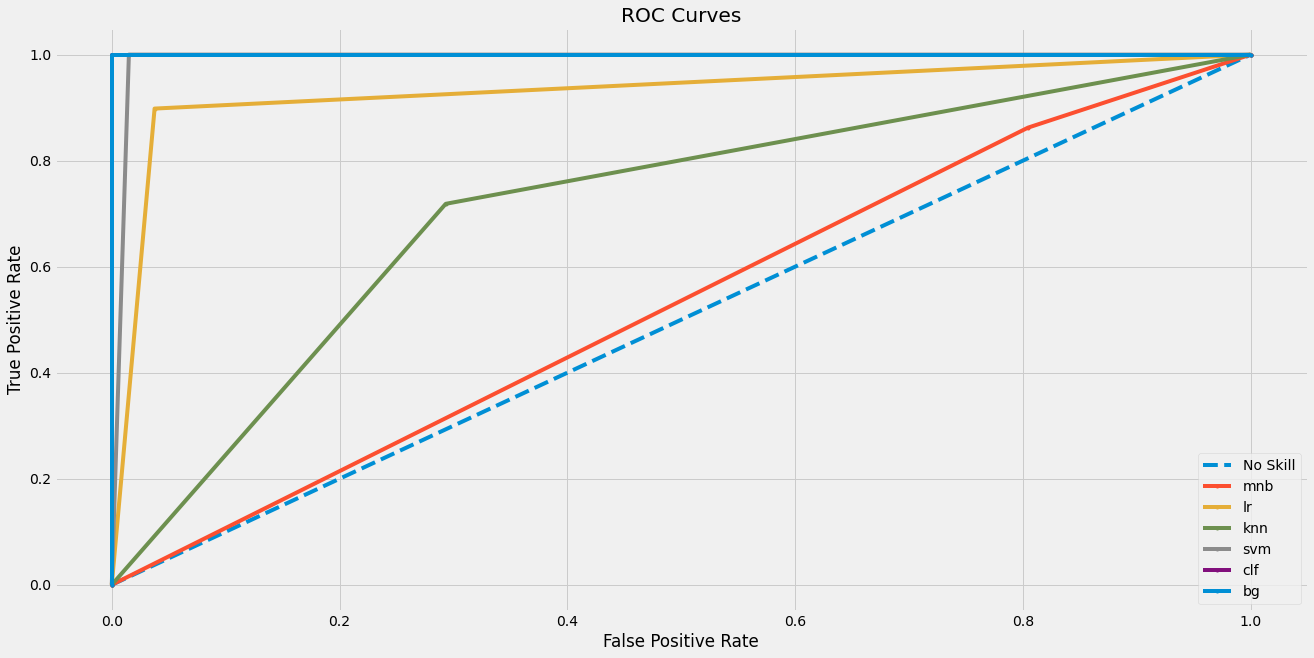

In [82]:
# ROC Curves Part 1
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
for i in range(0,len(modelos_nom)-5):
    print(modelos_nom[i] + ': ROC AUC=%.3f' % (lr_auc[i]))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

for i in range(0,len(modelos_nom)-5):
    lr_fpr=roc_curve(y_test,predicciones[modelos_nom[i]])[0]
    lr_tpr=roc_curve(y_test,predicciones[modelos_nom[i]])[1]
    plt.plot(lr_fpr, lr_tpr, marker='.', label=modelos_nom[i])
plt.title('ROC Curves')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
adb: ROC AUC=1.000
rf: ROC AUC=1.000
ppr: ROC AUC=0.676
MLP: ROC AUC=0.853
LSTM: ROC AUC=0.971


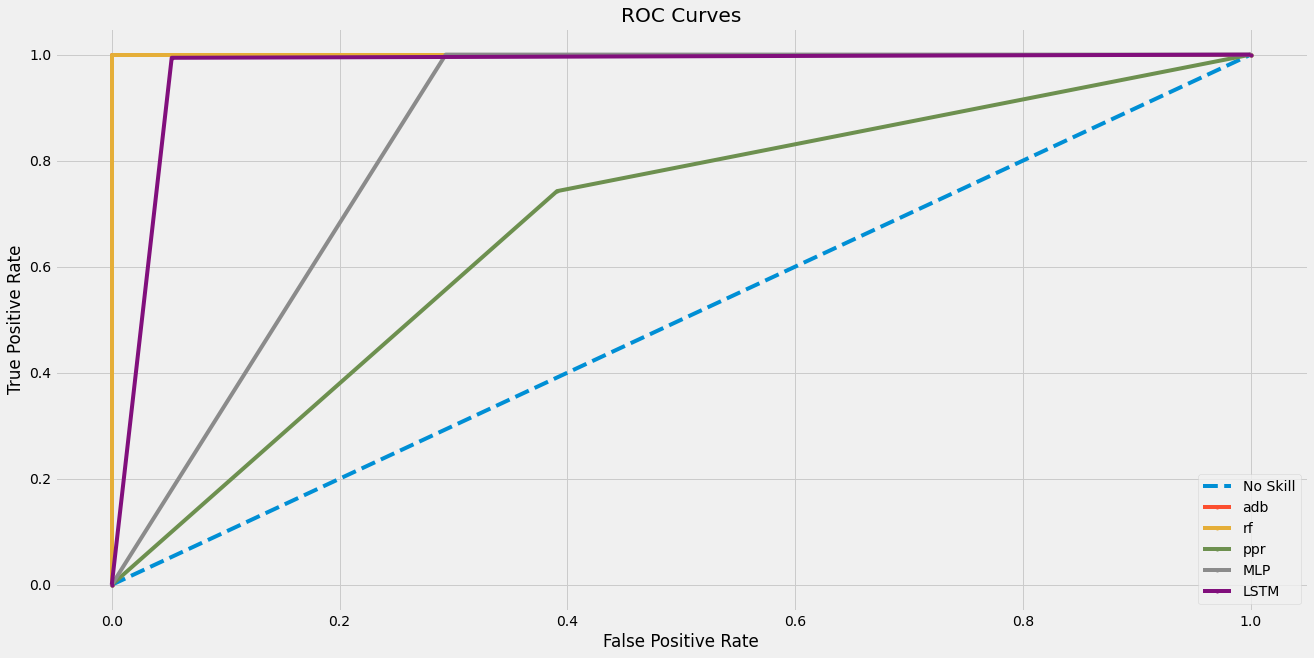

In [83]:
# ROC Curves Part 2
print('No Skill: ROC AUC=%.3f' % (ns_auc))
for i in range(6,len(modelos_nom)):
    print(modelos_nom[i] + ': ROC AUC=%.3f' % (lr_auc[i]))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

for i in range(6,len(modelos_nom)):
    lr_fpr=roc_curve(y_test,predicciones[modelos_nom[i]])[0]
    lr_tpr=roc_curve(y_test,predicciones[modelos_nom[i]])[1]
    plt.plot(lr_fpr, lr_tpr, marker='.', label=modelos_nom[i])
plt.title('ROC Curves')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### <font color= darkblue> Strategies: Prediction vs Reality

Next we will plot the actual movement of the BTC and the strategies resulting from following the predictions of the models.

First of all, we need to deal with the actual values of the BTC returns and not the scaled ones. With which, we will work with a new dataframe with the values without scaling.

In [84]:
X_aux = Bitcoin[::-1][split:]
X_aux = pd.DataFrame(Bitcoin,columns=Bitcoin.columns,index=Bitcoin[::-1][split:].index)

In order to make the graphs simultaneously, we will define for each model two new columns in the dataset: one with the predictions and the other with the strategies. Where by strategy we understand to buy (long) if the predictor indicates 1 and to sell (short) if it indicates −1 (0).

In [85]:
for i in range(0,len(modelos_nom)):
    X_aux['prediction_'+modelos_nom[i]] = np.where(predicciones[modelos_nom[i]] >= 0.5, 1, -1)
    X_aux['strategy'+modelos_nom[i]] = X_aux['prediction_'+modelos_nom[i]] * \
                                X_aux['Returns']

Next we graph the real movement of BTC vs the strategies. We will divide the cases into two graphs so that there is no piling up of plots.

Retorno acumulado usando strategy_mnb: 2.350000.3
Retorno acumulado usando strategy_lr: 8.582000.3
Retorno acumulado usando strategy_knn: 6.854000.3
Retorno acumulado usando strategy_svm: 8.842000.3
Retorno acumulado usando strategy_clf: 8.846000.3
Retorno acumulado usando strategy_bg: 8.846000.3


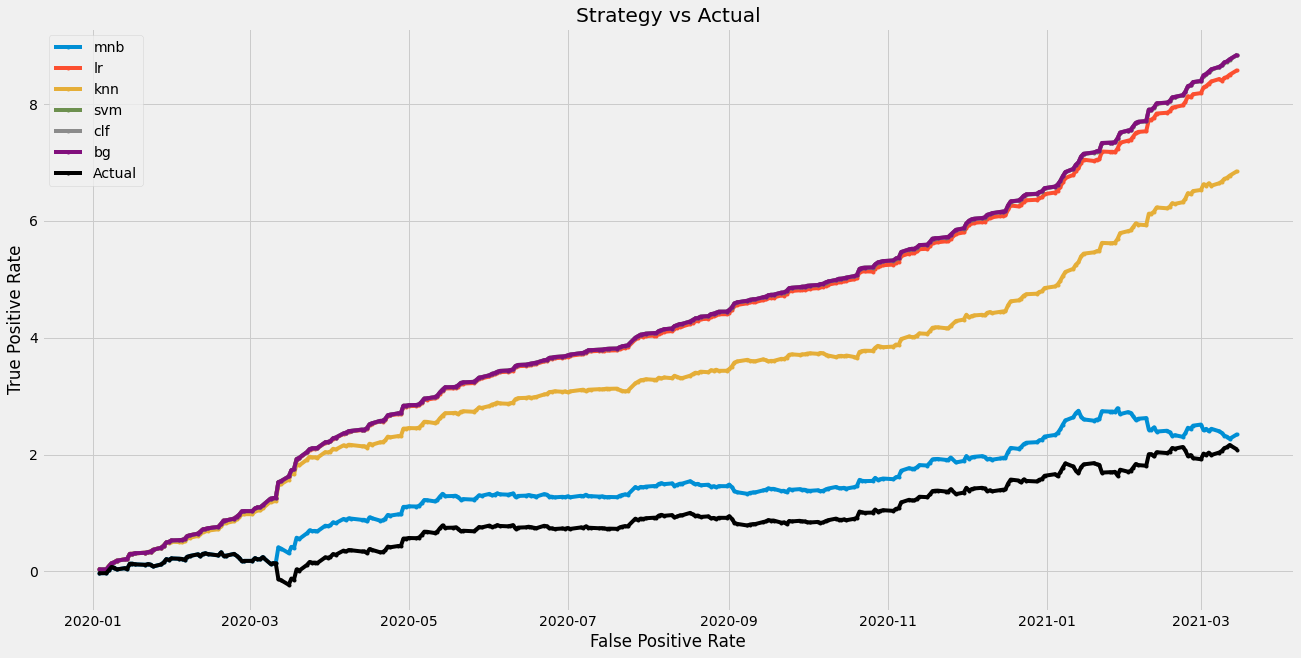

In [86]:
# Strategies Part 1
for i in range(0,len(modelos_nom)-5):
    plt.plot(X_aux['strategy'+modelos_nom[i]].cumsum(),marker='.', label=modelos_nom[i])
    print('Retorno acumulado usando strategy_'+modelos_nom[i]+': %f.3' % X_aux['strategy'+modelos_nom[i]].sum())
plt.plot(X_aux['Returns'].cumsum(),marker='.', label='Actual',color='black')
plt.title('Strategy vs Actual')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Retorno acumulado usando strategy_adb: 8.846000.3
Retorno acumulado usando strategy_rf: 8.846000.3
Retorno acumulado usando strategy_ppr: 3.600000.3
Retorno acumulado usando strategy_MLP: 8.382000.3
Retorno acumulado usando strategy_LSTM: 8.824000.3


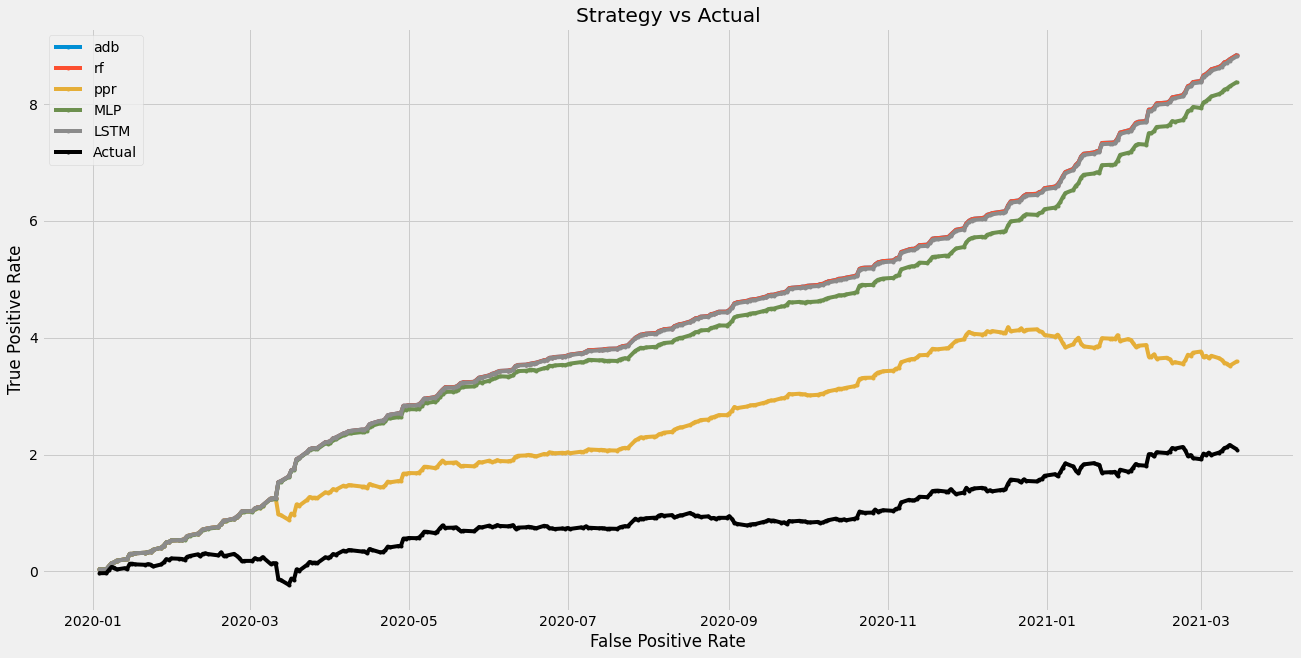

In [87]:
# Strategies Part 2
for i in range(6,len(modelos_nom)):
    plt.plot(X_aux['strategy'+modelos_nom[i]].cumsum(),marker='.', label=modelos_nom[i])
    print('Retorno acumulado usando strategy_'+modelos_nom[i]+': %f.3' % X_aux['strategy'+modelos_nom[i]].sum())
plt.plot(X_aux['Returns'].cumsum(),marker='.', label='Actual',color='black')
plt.title('Strategy vs Actual')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Let's see what the winning strategy is.

In [88]:
strategies=[]
for i in range(0,len(modelos_nom)):
    aux=X_aux['strategy'+modelos_nom[i]].sum()
    strategies.append(aux)
    print('La estrategia de '+modelos_nom[i]+' tiene un retorno acumulado de: %.3f' % aux)

La estrategia de mnb tiene un retorno acumulado de: 2.350
La estrategia de lr tiene un retorno acumulado de: 8.582
La estrategia de knn tiene un retorno acumulado de: 6.854
La estrategia de svm tiene un retorno acumulado de: 8.842
La estrategia de clf tiene un retorno acumulado de: 8.846
La estrategia de bg tiene un retorno acumulado de: 8.846
La estrategia de adb tiene un retorno acumulado de: 8.846
La estrategia de rf tiene un retorno acumulado de: 8.846
La estrategia de ppr tiene un retorno acumulado de: 3.600
La estrategia de MLP tiene un retorno acumulado de: 8.382
La estrategia de LSTM tiene un retorno acumulado de: 8.824


\clearpage

#  <font color= darkblue> Conclution

We have shown how different statistical models are created and trained for the same data set and to solve the same classification task.

Furthermore, we have compared the models in terms of the prediction score of each and in terms of their ROC curves.

To finish finding the best models, let's rank the models according to their training speed, their prediction score, and their level of overfitting.

#### <font color= darkblue> Best Runtime

In terms of training speed, we have the following classification

In [89]:
modelos_nom.insert(8,'evc')# We have to add 'evc'

In [90]:
min_coef_index=list(np.argsort(runtimes))
for i in min_coef_index:
    print('El tiempo de demora del modelo '+modelos_nom[i]+' es: %f' % runtimes[i])

El tiempo de demora del modelo svm es: 0.010957
El tiempo de demora del modelo mnb es: 0.013919
El tiempo de demora del modelo clf es: 0.014547
El tiempo de demora del modelo knn es: 0.015771
El tiempo de demora del modelo adb es: 0.017202
El tiempo de demora del modelo bg es: 0.045135
El tiempo de demora del modelo rf es: 0.055037
El tiempo de demora del modelo evc es: 0.072774
El tiempo de demora del modelo lr es: 0.145054
El tiempo de demora del modelo ppr es: 3.005558
El tiempo de demora del modelo LSTM es: 19.837829
El tiempo de demora del modelo MLP es: 37.850020


The model with the best runtime is

In [91]:
modelos_nom[runtimes.index(np.min(runtimes))]

'svm'

#### <font color= darkblue> Best Prediction Score
    
In terms of the best prediction in the test set we have the following classification

In [92]:
modelos_nom.remove('evc') # We have to remove 'evc'

In [93]:
min_coef_index=list(np.argsort(scores)[::-1])
for i in min_coef_index:
    print('El modelo '+modelos_nom[i]+' tiene un score de: %f' % scores[i])

El modelo rf tiene un score de: 1.000000
El modelo adb tiene un score de: 1.000000
El modelo bg tiene un score de: 1.000000
El modelo clf tiene un score de: 1.000000
El modelo svm tiene un score de: 0.993333
El modelo LSTM tiene un score de: 0.973333
El modelo lr tiene un score de: 0.926667
El modelo MLP tiene un score de: 0.870000
El modelo knn tiene un score de: 0.713333
El modelo ppr tiene un score de: 0.683333
El modelo mnb tiene un score de: 0.566667


#### <font color= darkblue> Worst Overfitting:
    
Based on the table above, the worst overfitting algorithms are clearly: rf, adb, bg, and clf. That is, all those linked to decision trees.

#### <font color= darkblue> Best Algorithms:
    
Taking into account the two previous metrics we can say that the best three models are: knn, svm and lr.

\begin{thebibliography}{}
    
    \bibitem{}
    C. Alexander et. al. \textit{Price discovery in Bitcoin: The impact of unregulated markets}. Journal of Financial Stability, Volume 50, October 2020.

    \bibitem{}
    C. Alexander. \textit{Bitcoin Derivatives: the impact of Unregulated Markets on Price Discovery and Introducing the BVIX}. 6th Quant Insights Conference https://www.qiconference.com/

    \bibitem{}
    T. Guida. \textit{Big Data and Machine Learning in Quantitative Investment}. John Wiley \& Sons, Ltd. ISBN 9781119522195. (2019)

    \bibitem{}
    Y. Hilpisch. \textit{Python for Algorithmic Trading}. O’Reilly Media, Inc. (2020)

    \bibitem{}
    Matt H and Daniel R. \textit{Practical Advice for Building Deep Neural Networks}. https://pcc.cs.byu.edu/2017/10/02/practical-advice-for-building-deep-neural-networks/

    \bibitem{}
    S. Nakamoto. \textit{Bitcoin: A Peer-to Peer Electronic Cash System}. white paper (2008). Available at https://bitcoin.org/bitcoin.pdf

    \bibitem{}
    Pang et. al. \textit{Stock Market Prediction based on Deep Long Short-Term Memory Neural network}. Proceedings of the 3rd International Conference on Complexity, Future Information Systems and Risk (COMPLEXIS 2018), pages 102-108. ISBN: 9789897582974
    
    \bibitem{}
    K. Singaravelu. \textit{Introduction to Deep Learning \& Neural Networks}. CQF Lecture series – Module 5 Data Science and Machine Learning II – October, 2020

    \bibitem{}
    K. Singaravelu. \textit{Application of Neural Networks}. CQF Python Labs – October, 2020

    \bibitem{}
    Roc curve:  "Detector Performance Analysis Using ROC Curves - MATLAB \& Simulink Example". www.mathworks.com. Retrieved 11 August 2016.

    \bibitem{}
    MinMaxScaler: https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html.

    \bibitem{}
    Decision Tree Classifier: https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3.

    \bibitem{}
    Projection Pursuit Classifier: https://pavelkomarov.com/projection-pursuit/skpp.html\#module-skpp.

    \bibitem{}
    Averaging ensemble: https://machinelearningmastery.com/weighted-average-ensemble-for-deep-learning-neural-networks/.

    \bibitem{}
    Time series cross validation: https://robjhyndman.com/hyndsight/tscv/.

    \bibitem{}
    For further information on blockchain technology, please consult Ahonen E. (2021) Blockland - 21 Stories of Bitcoin, Blockchain, and Cryptocurrency available at https://www.cryptonumist.com/
	
\end{thebibliography}